# Prediction Using Supervised ML

In [33]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [37]:
data.drop_duplicates(inplace=True)

In [40]:
# Removing outliers using IQR method

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualising the relationship between the study hours and  the scores

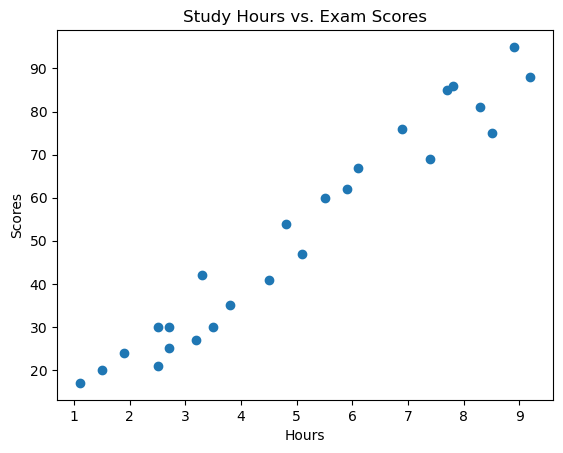

In [42]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study Hours vs. Exam Scores')
plt.show() 

In [12]:
X = data[['Hours']]
y = data['Scores']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Created a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Predict the scores for the test set
y_pred = model.predict(X_test)


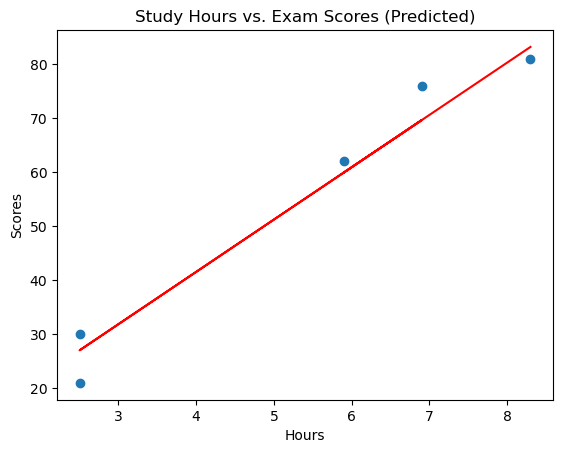

In [18]:
# Plot the predicted scores
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study Hours vs. Exam Scores (Predicted)')
plt.show()


## Evaluation of Model

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994


### Input and Output

In [46]:
hours = float(input('Enter the number of study hours: '))
predicted_score = model.predict([[hours]])
print('Predicted Score:', predicted_score[0])

Enter the number of study hours: 9.25
Predicted Score: 92.38611528261494


C:\Users\kajal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### Predicted Score will be 92.38 if student studies for 9.25hrs/day